# 使用 TensorFlow 实现 Linear Regression

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
rng = np.random

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [6]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [8]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [9]:
pred = tf.add(tf.mul(X, W), b)

In [10]:
# 代价函数
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [11]:
# Gradient Descent
# Docs: https://www.tensorflow.org/api_docs/python/train/optimizers#Optimizer.minimize

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
init = tf.global_variables_initializer()

Epoch: 0050 cost=0.398565024 W=0.56651371717453 b=-1.478433609008789
Epoch: 0100 cost=0.361425459 W=0.5476650595664978 b=-1.3428391218185425
Epoch: 0150 cost=0.328573108 W=0.5299373269081116 b=-1.215306282043457
Epoch: 0200 cost=0.299514413 W=0.513264000415802 b=-1.095360517501831
Epoch: 0250 cost=0.273810267 W=0.4975823163986206 b=-0.9825466871261597
Epoch: 0300 cost=0.251074433 W=0.4828333258628845 b=-0.8764439225196838
Epoch: 0350 cost=0.230963275 W=0.46896135807037354 b=-0.7766493558883667
Epoch: 0400 cost=0.213174775 W=0.4559144675731659 b=-0.6827916502952576
Epoch: 0450 cost=0.197439909 W=0.4436434209346771 b=-0.5945140719413757
Epoch: 0500 cost=0.183522582 W=0.4321025013923645 b=-0.5114894509315491
Epoch: 0550 cost=0.171212196 W=0.4212477207183838 b=-0.43340134620666504
Epoch: 0600 cost=0.160323575 W=0.4110387861728668 b=-0.35995811223983765
Epoch: 0650 cost=0.150692448 W=0.4014367461204529 b=-0.2908823490142822
Epoch: 0700 cost=0.142173767 W=0.39240601658821106 b=-0.22591572999

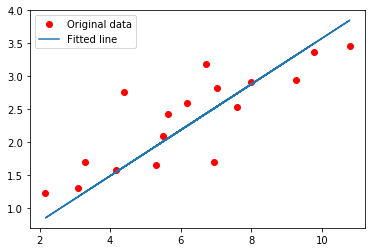

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch: {:04d} cost={:.9f} W={} b={}".format(epoch + 1, c, sess.run(W), sess.run(b)))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost={} W={} b={}".format(training_cost, sess.run(W), sess.run(b)))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()